In [4]:
import json
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# reading training data
path = "/Users/kalnisp/KAUST Dropbox/Panos Kalnis/SSTD 2025 Paper/Data Porto/"
filename = "train.csv"
zf = zipfile.ZipFile(path+filename+".zip")
df = pd.read_csv(zf.open(filename), converters={'POLYLINE': lambda x: json.loads(x)[-1:]})
latlong = np.array([[p[0][1], p[0][0]] for p in df['POLYLINE'] if len(p)>0])



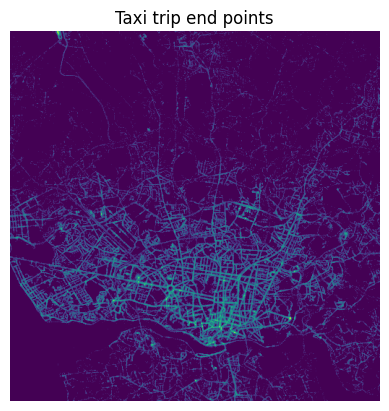

In [5]:
# cut off long distance trips
lat_low, lat_hgh = np.percentile(latlong[:,0], [2, 98])
lon_low, lon_hgh = np.percentile(latlong[:,1], [2, 98])

# create image
bins = 513
lat_bins = np.linspace(lat_low, lat_hgh, bins)
lon_bins = np.linspace(lon_low, lon_hgh, bins)
H2, _, _ = np.histogram2d(latlong[:,0], latlong[:,1], bins=(lat_bins, lon_bins))

img = np.log(H2[::-1, :] + 1)

plt.figure()
ax = plt.subplot(1,1,1)
plt.imshow(img)
plt.axis('off')
plt.title('Taxi trip end points')
plt.savefig("taxi_trip_end_points.png")

In [7]:
print(lat_low, lat_hgh)
print(lon_low, lon_hgh)

41.123232 41.237424
-8.687466 -8.553186
